###### Part A: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

###### Importing required packages

In [30]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
fimport matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image

SyntaxError: invalid syntax (2463414397.py, line 5)

###### Part 1. 1 a - Reading all the 3 CSV files as DataFrame and storeing them into 3 separate variables.

In [3]:
df1 = pd.read_csv('Part1_Normal.csv')
df2 = pd.read_csv('Part1_Type_H.csv')
df3 = pd.read_csv('Part1_Type_S.csv')

###### Part 1.1 b - Printing Shape and columns of all the 3 DataFrames

In [4]:
#Shape of Dataframes
print(df1.shape)
print(df2.shape)
print(df3.shape)

(100, 7)
(60, 7)
(150, 7)


In [5]:
#Columns of Dataframes
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


###### Part 1.1 c - Compare Column names of all the 3 DataFrames and clearly write observations 

In [6]:
#Reading first 5 rows of each dataframes
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [7]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [8]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


###### Part 1.1 d - Print DataTypes of all the 3 DataFrames. 

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


###### Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames 

In [12]:
df1['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [13]:
df2['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [14]:
df3['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

######  Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [16]:
#Here Normal and Nrmal, TypeH and type h, tp_s and Type_S represents same class.
df1.loc[df1['Class']=='Nrmal','Class']='Normal'
df2.loc[df2['Class']=='type_h','Class']='Type_H'
df3.loc[df3['Class']=='tp_s','Class']='Type_S'

In [17]:
print(df1['Class'].value_counts())
print(df2['Class'].value_counts())
print(df3['Class'].value_counts())

Normal    100
Name: Class, dtype: int64
Type_H    60
Name: Class, dtype: int64
Type_S    150
Name: Class, dtype: int64


###### Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame

In [18]:
df = df1.append([df2,df3])

In [25]:
#checking for the count of Null Values
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [20]:
#changing the datatype of 'Class'
df['Class']=df['Class'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 17.4 KB


In [21]:
df['Class'].nunique()

3

###### Part 1.2 c - Print 5 random samples of this DataFrame 

In [22]:
df.sample(n = 5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
64,74.717228,14.321679,32.500000,60.395549,107.182218,37.017080,Type_S
22,63.073611,24.413803,54.000000,38.659808,106.424329,15.779697,Type_H
53,30.149936,11.917445,34.000000,18.232491,112.684141,11.463223,Type_H
33,58.101935,14.837639,79.649838,43.264295,113.587655,50.237878,Type_S
66,70.676898,21.704402,59.181161,48.972496,103.008354,27.810148,Type_S


###### Part 1.2 d - Print Feature-wise percentage of Null values

In [26]:
percent= 100*(len(df.loc[:,df.isnull().sum(axis=0)>=1 ].index) / len(df.index))
print(round(percent,2))

100.0


###### Part 1.2 e - Check 5-point summary of the new DataFrame

In [24]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P_incidence,310.0,NaN,NaN,NaN,60.496653,17.23652,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,NaN,NaN,NaN,17.542822,10.00833,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,NaN,NaN,NaN,51.93093,18.554064,14.0,37.0,49.562398,63.0,125.742385
S_slope,310.0,NaN,NaN,NaN,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,NaN,NaN,NaN,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,NaN,NaN,NaN,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
Class,310,3,Type_S,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### P_incidence:
###### Mean and Median are nearly equal . Distribution might be normal. Maxiumum value is 129 but 75 % of values are less than 72.

###### P_tilt:
###### Mean and median are almost equal. Distribution may be normal. INegative values are seen since its minimum value is -7. 75 % of values are less than 22 but maximum value is 49 so there might be little right skewness

###### L_angle:
###### Mean and Median are nearly equal. There is no deviation. Distribution might be normal. There might be few outliers. 

###### S_slope:
###### Mean and Median are nearly equal. Towards the end there may be little devation. 75% of values are lesser than 52 but maximum value is 121.

###### P_radius:
###### Distribution might be normal. There may not be much Deviation.

###### S_Degree:
###### Mean is greater than Median, so the data might be rightly skewed. We can see 75% of values are less than 41 but maximum value is 418 so there will be outliers in the data.

###### Part 1.3 a - Visualize a heatmap to understand correlation between all features 
###### Part 1.3 b - Share insights on correlation 

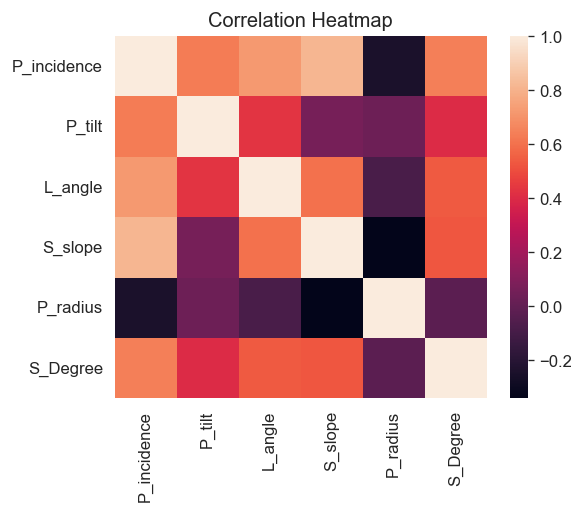

In [27]:
plt.figure(dpi = 120,figsize= (5,4))
# mask = np.triu(np.ones_like(df.corr()))
# sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
sns.heatmap(df.corr())
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

###### class type affects each and every independent variables 

###### Part 1.3 c - Visualize a pairplot with 3 classes distinguished by colors and share insights

In [33]:
#Resetting the original index for plotting graphs
df.reset_index(inplace = True,drop = True)

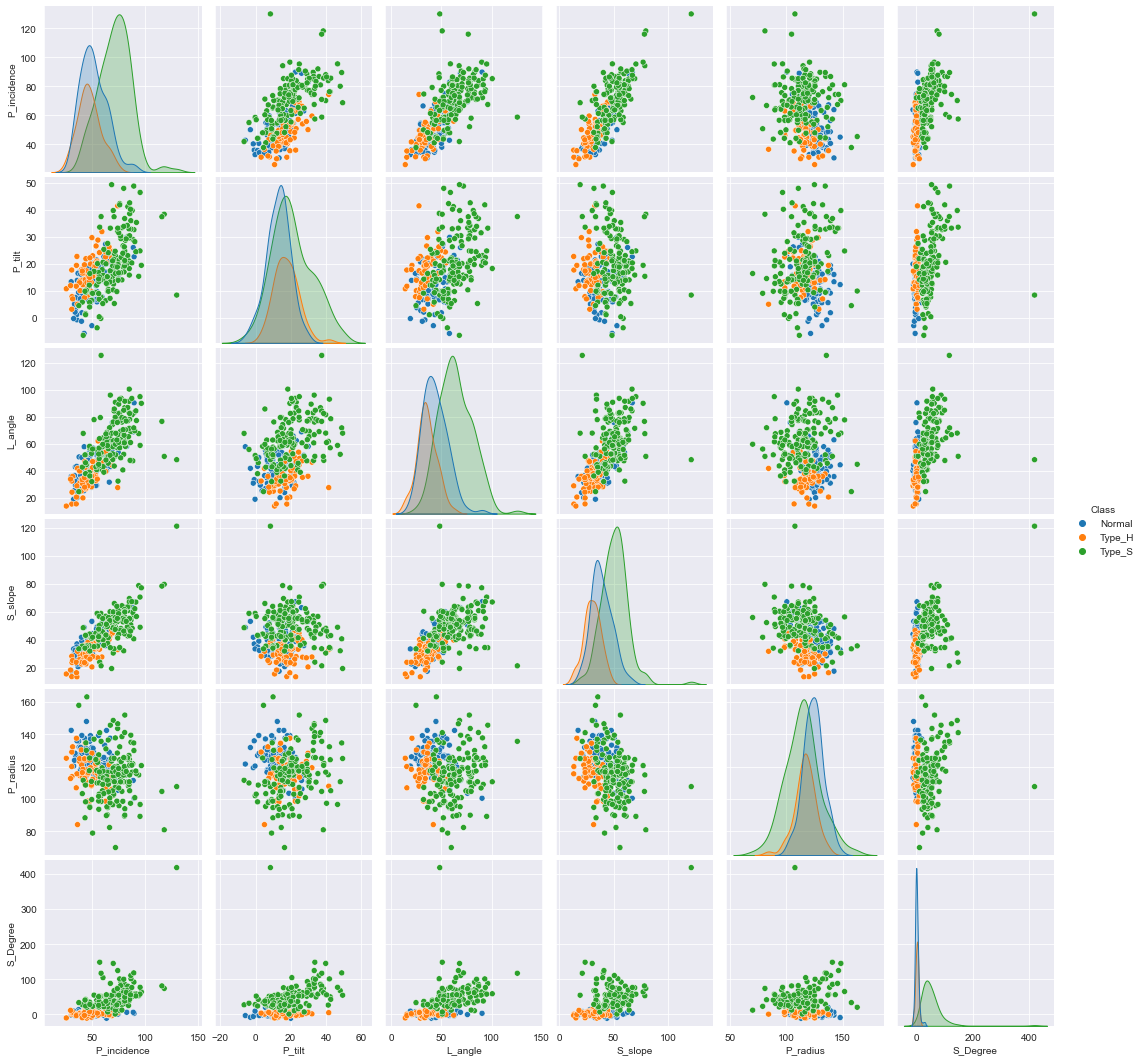

In [34]:
sns.pairplot(data = df, hue= 'Class')

###### Along the diagonal we can see that the  distribution of variable for three claases are not same. It is evident that type_s class is more compared to other two. Normal class has higher values compared to Type_H.

###### Part 1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights 

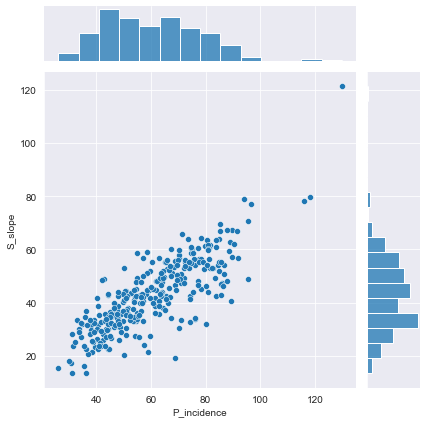

In [35]:
sns.jointplot(data = df,x = 'P_incidence',y = 'S_slope');

###### Positive correlation between P_incidence and S_slope has seen

###### Part 1.3 e - Visualize a boxplot to check distribution of the features and share insights.

###### P_incidence:

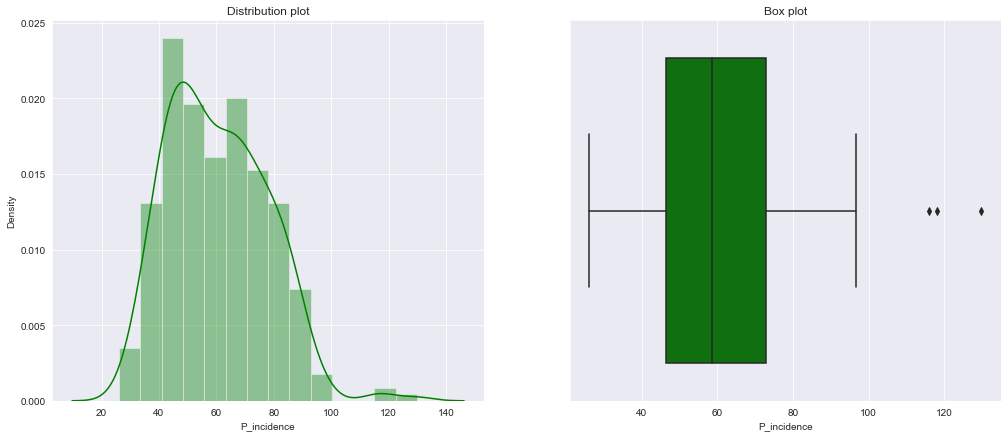

 Total Number of outliers in P_incidence: 3


In [36]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_incidence', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['P_incidence'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['P_incidence'],25),np.percentile(df['P_incidence'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['P_incidence'] if i < lower or i > upper]
print('{} Total Number of outliers in P_incidence: {}'.format('\033[1m',len(Outliers)))

###### Normality is maintained with very less extreme values.

###### P_tilt:

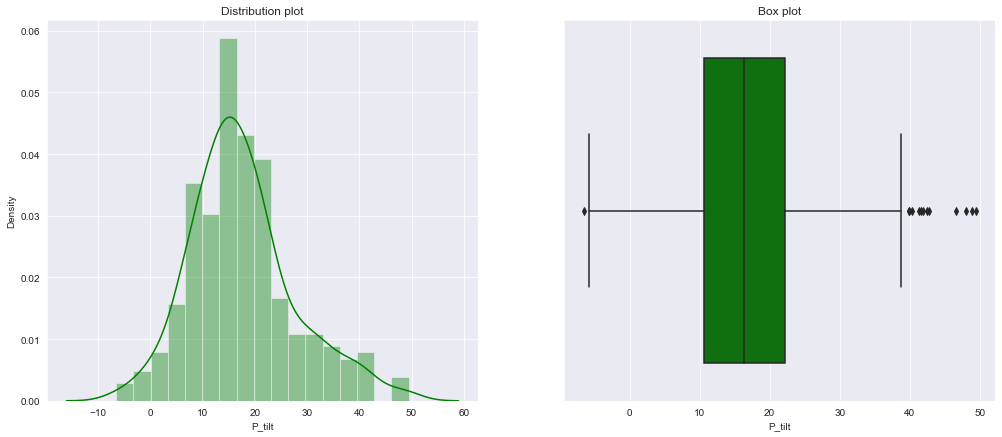

 Total Number of outliers in P_tilt: 13


In [38]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_tilt', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['P_tilt'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['P_tilt'],25),np.percentile(df['P_tilt'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['P_tilt'] if i < lower or i > upper]
print('{} Total Number of outliers in P_tilt: {}'.format('\033[1m',len(Outliers)))

###### Data is Normally distributed and we can see one peakness in the center. It is has little skewness towards right side.We can see one outlier in negative end and few outliers in positive end.

###### L_angle:

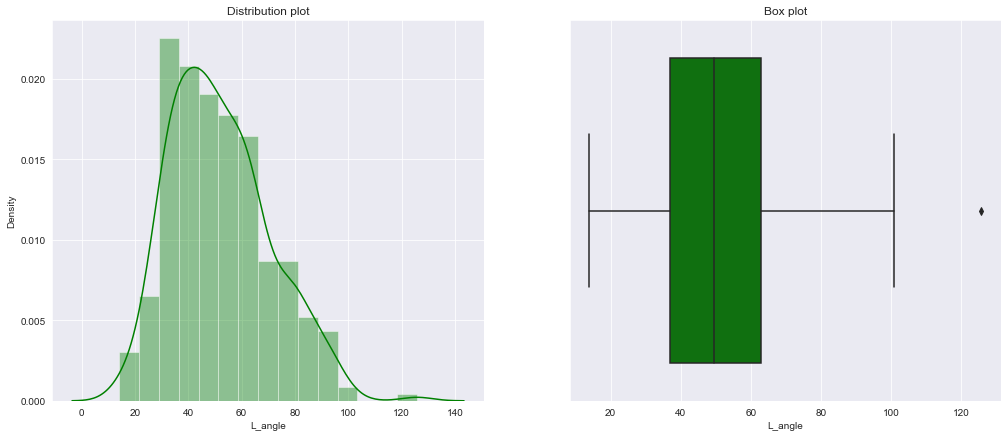

 Total Number of outliers in L_angle: 1


In [39]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'L_angle', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['L_angle'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['L_angle'],25),np.percentile(df['L_angle'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['L_angle'] if i < lower or i > upper]
print('{} Total Number of outliers in L_angle: {}'.format('\033[1m',len(Outliers)))

###### It is Normally distributed

###### S_slope:

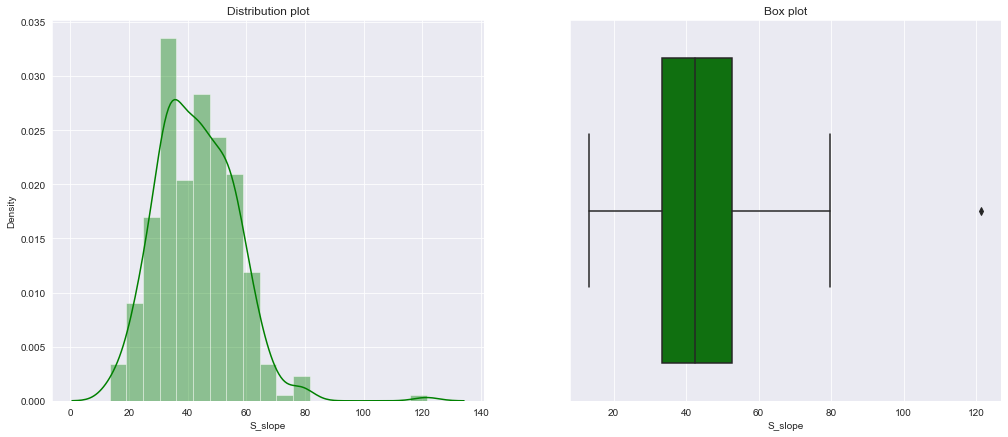

 Total Number of outliers in S_slope: 1


In [40]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_slope', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['S_slope'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['S_slope'],25),np.percentile(df['S_slope'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['S_slope'] if i < lower or i > upper]
print('{} Total Number of outliers in S_slope: {}'.format('\033[1m',len(Outliers)))

###### Data is normally distributed. We can see outliers at both the ends.

###### S_Degree:

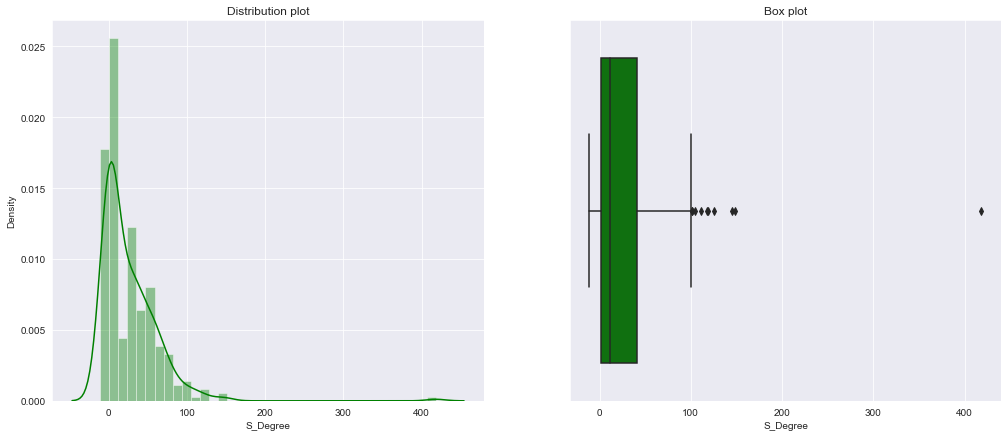

 Total Number of outliers in S_Degree: 10


In [41]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_Degree', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['S_Degree'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['S_Degree'],25),np.percentile(df['S_Degree'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['S_Degree'] if i < lower or i > upper]
print('{} Total Number of outliers in S_Degree: {}'.format('\033[1m',len(Outliers)))

###### There is Positive Skewness in the data.

###### Part 1.4 a - Split data into X and Y. 

In [42]:
# Arranging data into independent variables and dependent variables
X=df.drop(columns='Class')
y=df['Class'] #target variable

In [44]:
#Scaling Independent Variables
X_Scaled=X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,1.042177e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.096889e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,2.829278e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-5.071212e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-1.277204e-16,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


###### Part 1.4 b - Split data into train and test with 80:20 proportion 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

###### Part 1.4 c - Train a Supervised Learning Classification base model using KNN classifier

In [46]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [47]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [48]:
#classification accuracy
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9153225806451613
Accuracy on Test data: 0.7096774193548387


###### Training Acuracy is 0.89 and Testing Accuracy is 0.77. 
###### Performance is less in test data. This is due to overfitting of data

###### Part 1.4 d - Print all the possible performance metrics for both train and test data 

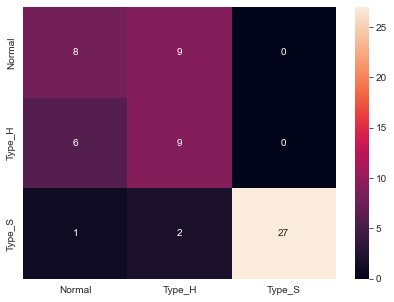

In [49]:
cm = confusion_matrix(y_test, predicted_labels)

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

###### Our model predicts Type_S correctly most of the time. Misclassification of labels are more when predicting normal class

In [50]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.53      0.47      0.50        17
      Type_H       0.45      0.60      0.51        15
      Type_S       1.00      0.90      0.95        30

    accuracy                           0.71        62
   macro avg       0.66      0.66      0.65        62
weighted avg       0.74      0.71      0.72        62



###### Part 1.5 a - Experiment with various parameters to improve performance of the base model 
###### Part 1.5 b - Clearly showcase improvement in performance achieved 
###### Part 1.5 c - Clearly state which parameters contributed most to improve model performance

In [51]:
#Finding best K value
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

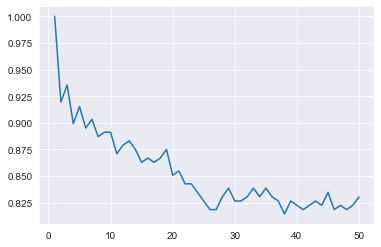

In [52]:
plt.plot(range(1,51),train_score)
plt.show()

###### training accuracy decreases when increase k value

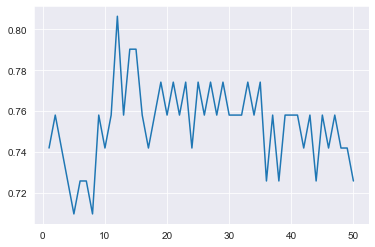

In [53]:
plt.plot(range(1,51),test_score)
plt.show()

###### Maximum accuracy occures when k is less than 20. Let's fix the k value as less than 20.

In [54]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7419354838709677:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74      0.74        62

Accuracy on Training data for k 3 is 0.9354838709677419:
Accuracy on Test data for k 3 is 0.7419354838709677:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74     

###### For K=13 we have balanced train and test error. we can use k value as 13 because when we increase this value the precision becomes100% for class 2

###### Part B: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

###### Part 2.1 a - Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

In [80]:
#reading data
df_bank_data1 = pd.read_csv('Part2_Data1.csv')
df_bank_data2 = pd.read_csv('Part2_Data2.csv')

###### Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes. 

In [81]:
print(df_bank_data1.shape)
print(df_bank_data2.shape)

(5000, 8)
(5000, 7)


###### Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [82]:
df_bankdata=df_bank_data1.merge(df_bank_data2,left_on='ID',right_on='ID') #id is common in both dataframe

In [83]:
df_bankdata.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [84]:
#Information on the dataset
df_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


###### Part 2.1 d - Change Datatype of below features to ‘Object’

In [85]:
col=['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for i in col:
 df_bankdata[i]=df_bankdata[i].astype('object')

In [86]:
df_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


In [87]:
#checking for null values
df_bankdata.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [88]:
#dropping NaN values
df_bankdata.dropna(axis=0,inplace=True)

In [89]:
#Id column and ZipCode columns are not useful in model building so dropping that feature
df_bankdata.drop('ID',axis=1,inplace=True)
df_bankdata.drop('ZipCode',axis=1,inplace=True)

In [90]:
#Resetting the original inxdex
df_bankdata.reset_index(inplace = True,drop = True)

In [91]:
df_bankdata.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,4980.0,NaN,NaN,NaN,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,NaN,NaN,NaN,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,NaN,NaN,NaN,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
HiddenScore,4980.0,4.0,1.0,1466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyAverageSpend,4980.0,NaN,NaN,NaN,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Level,4980.0,3.0,1.0,2089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,4980.0,NaN,NaN,NaN,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0
Security,4980.0,2.0,0.0,4460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FixedDepositAccount,4980.0,2.0,0.0,4678.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetBanking,4980.0,2.0,1.0,2974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Mean and Median of Age and CustomerSince columns are nearly equal. So there wont be any skewness. Mean is greater than Median in HighestSpend and MonthlyAverageSpend. So Positive skewness may be exist. We can see high fluctuation in Mortage column. 50% of data has zero values but maximum value is 635. This might be highly affected by outliers.

###### Part 2.2 a - Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights 

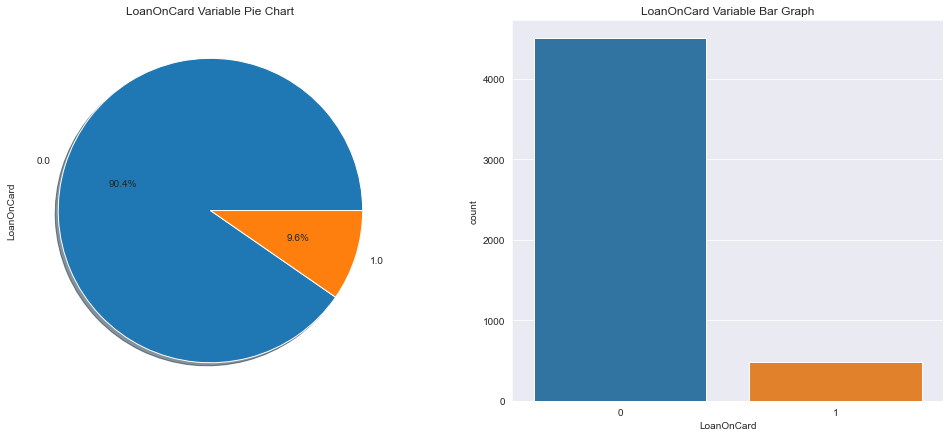

In [92]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df_bankdata['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df_bankdata,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

###### We can see 90% of people does not have loan on credit card

###### Part 2.2 b - Check the percentage of missing values and impute if required 

In [93]:
percent_missing = df_bankdata.isnull().sum() * 100 / len(df_bankdata)
percent_missing

Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64

###### Part 2.3 a- Split data into X and Y 
###### Part 2.3 b - Split data into train and test. Keep 25% data reserved for testing 

In [94]:
X=df_bankdata.drop(columns='LoanOnCard')
y=df_bankdata['LoanOnCard'] #target variable

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

###### Part 2.3 c - Train a Supervised Learning Classification base model - Logistic Regression 

In [95]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.948326639892905
Accuracy on Test data: 0.9558232931726908


###### 94% accuracy on training set and 95% accuracy on test set

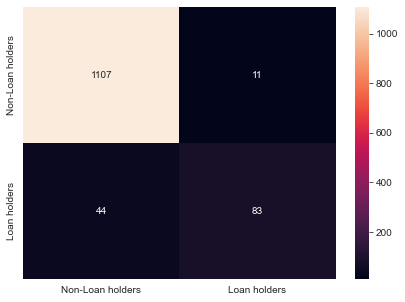

In [96]:
#Heatmap of Confusion Matrix
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

###### IFrom the above figure figure 44 and 7 are the errors in the model.

In [97]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1118
         1.0       0.88      0.65      0.75       127

    accuracy                           0.96      1245
   macro avg       0.92      0.82      0.86      1245
weighted avg       0.95      0.96      0.95      1245



###### KNN

In [98]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9151271753681393
Accuracy on Test data: 0.9116465863453815


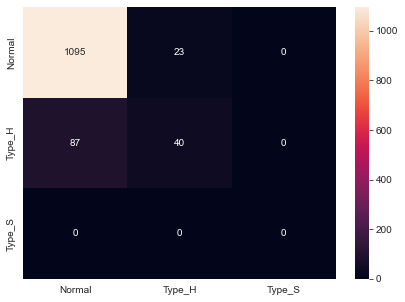

In [99]:
#heatmap of confusion matrix
cm = confusion_matrix(y_test, predicted_labels, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [100]:
#Finding best K value
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))#Finding best K value

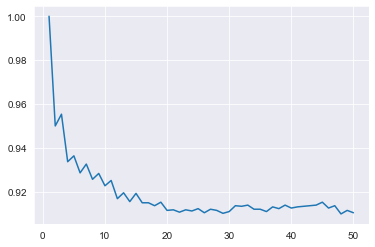

In [101]:
plt.plot(range(1,51),train_score)
plt.show()

###### Here training accuracy decreases when increase k value

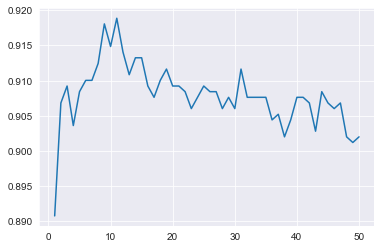

In [102]:
plt.plot(range(1,51),test_score)
plt.show()

###### The maximum accuracy occures when k is less than 15. Let's fix k value as less than 12.

In [103]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [104]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9515394912985274
0.9550200803212852
